## Importing Library

* importing the pandas library to load and save the dataset.
* importing the numpy library to deal with numerical values.
* importing the matplotlib.pyplot or seaborn to create and plot a data to visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('fraudTrain.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'fraudTrain.csv'

In [ ]:
## Checking the first 5 columns of the dataset

In [ ]:
df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [6]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


## Data Analysis

Let's have some data visualization to check the relation or correlation with the other features

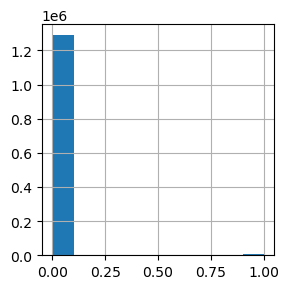

In [7]:
plt.figure(figsize=(3, 3))
df['is_fraud'].hist()
plt.show()

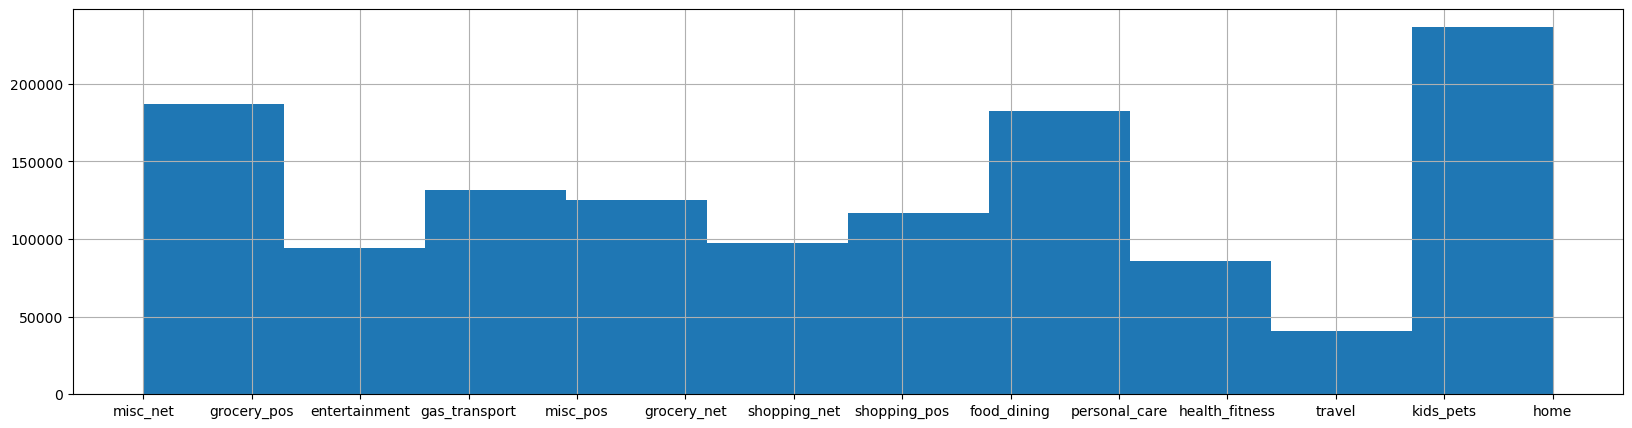

In [8]:
plt.figure(figsize=(20, 5))
df['category'].hist()
plt.show()

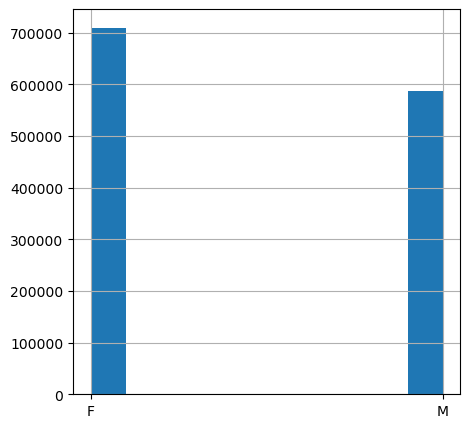

In [9]:
plt.figure(figsize=(5, 5))
df['gender'].hist()
plt.show()

In [10]:
print(df['amt'].corr(df['is_fraud']))
print(df['long'].corr(df['is_fraud']))
print(df['lat'].corr(df['is_fraud']))
print(df['city_pop'].corr(df['is_fraud']))
print(df['unix_time'].corr(df['is_fraud']))

0.21940388895891133
0.0017208127515253519
0.0018939555104846434
0.002135902418198628
-0.005077633322334847


## Feature Label Encoder

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

class FeatureLabel(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        label = LabelEncoder()
        X['gender'] = label.fit_transform(X['gender'])
        X['category'] = label.fit_transform(X['category'])

        return X

## Pipeline


In [12]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('feature_label', FeatureLabel())
])

In [13]:
train_data = pipeline.fit_transform(df)

In [14]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",8,4.97,Jennifer,Banks,0,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",4,107.23,Stephanie,Gill,0,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,0,220.11,Edward,Sanchez,1,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",2,45.00,Jeremy,White,1,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,9,41.96,Tyler,Garcia,1,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [15]:
## Create the Features and Label

In [16]:
features = ['amt', 'category', 'gender', 'lat', 'long', 'unix_time']
label = 'is_fraud'

<Axes: >

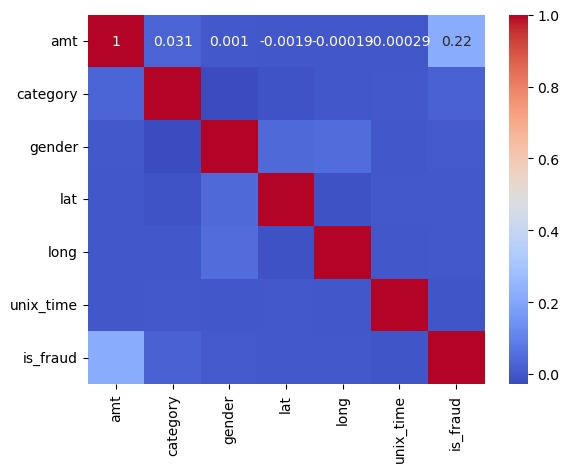

In [17]:
maping = ['amt', 'category', 'gender', 'lat', 'long', 'unix_time', 'is_fraud']
sns.heatmap(data=train_data[maping].corr(), annot=True, cmap='coolwarm')

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(train_data[features])
y = train_data[label].to_numpy()

## Spliting the Dataset into two part Training and Testing


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## LogisticRegression Model

In [20]:
from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()

model_1.fit(X_train, y_train)

LogisticRegression()

In [21]:
pred_1 = model_1.predict(X_test)

## Evaluation Model

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(y_test, pred_1))

Accuracy Score: 0.9937648215628434


In [23]:
df_2 = pd.read_csv('fraudTest.csv')

In [24]:
df_2.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [25]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [26]:
df_2.shape

(555719, 23)

In [27]:
test_data = pipeline.fit_transform(df_2)

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtest = scaler.fit_transform(test_data[features])
ytest = test_data['is_fraud'].to_numpy()

In [29]:
test_pred = model_1.predict(Xtest)

## Evalute the Model with the fraudTest dataset

Let's check who will the model perform with the fraudtest dataset

In [30]:
from sklearn.metrics import accuracy_score

print("Accuracy Score:", accuracy_score(ytest, test_pred))

Accuracy Score: 0.9954887272164529


In [31]:
import pickle

In [32]:
model_name = 'credit_fraud.pkl'

with open(model_name, 'wb') as file:
    pickle.dump(model_1, file)

In [35]:
with open('model/credit_fraud.pkl', 'rb') as file:
    log_model = pickle.load(file)